<a href="https://colab.research.google.com/github/newbackjava/python-data/blob/master/Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 1) 데이터 불러오기
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)  # 독립변수
y = pd.Series(data.target)                              # 타깃(0: 악성, 1: 양성)

X.shape, y.shape

((569, 30), (569,))

In [ ]:
print("특징(피처) 이름들:", data.feature_names[:5], "...")   # 일부만 보기
print("타깃 이름:", data.target_names)  # ['malignant' 'benign']

# 타깃 분포
y.value_counts()

특징(피처) 이름들: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness'] ...
타깃 이름: ['malignant' 'benign']


,count
1,357
0,212


In [ ]:
y.value_counts(normalize=True) * 100  # 비율(%)

,proportion
1,62.741652
0,37.258348


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% 테스트
    stratify=y,           # 타깃 비율 유지
    random_state=42
)

X_train.shape, X_test.shape

((455, 30), (114, 30))

In [ ]:
dt = DecisionTreeClassifier(
    random_state=42
)

dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# 예측
y_pred = dt.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print(classification_report(y_test, y_pred, target_names=data.target_names))

Accuracy: 0.9122807017543859
Confusion Matrix:
 [[39  3]
 [ 7 65]]
              precision    recall  f1-score   support

   malignant       0.85      0.93      0.89        42
      benign       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



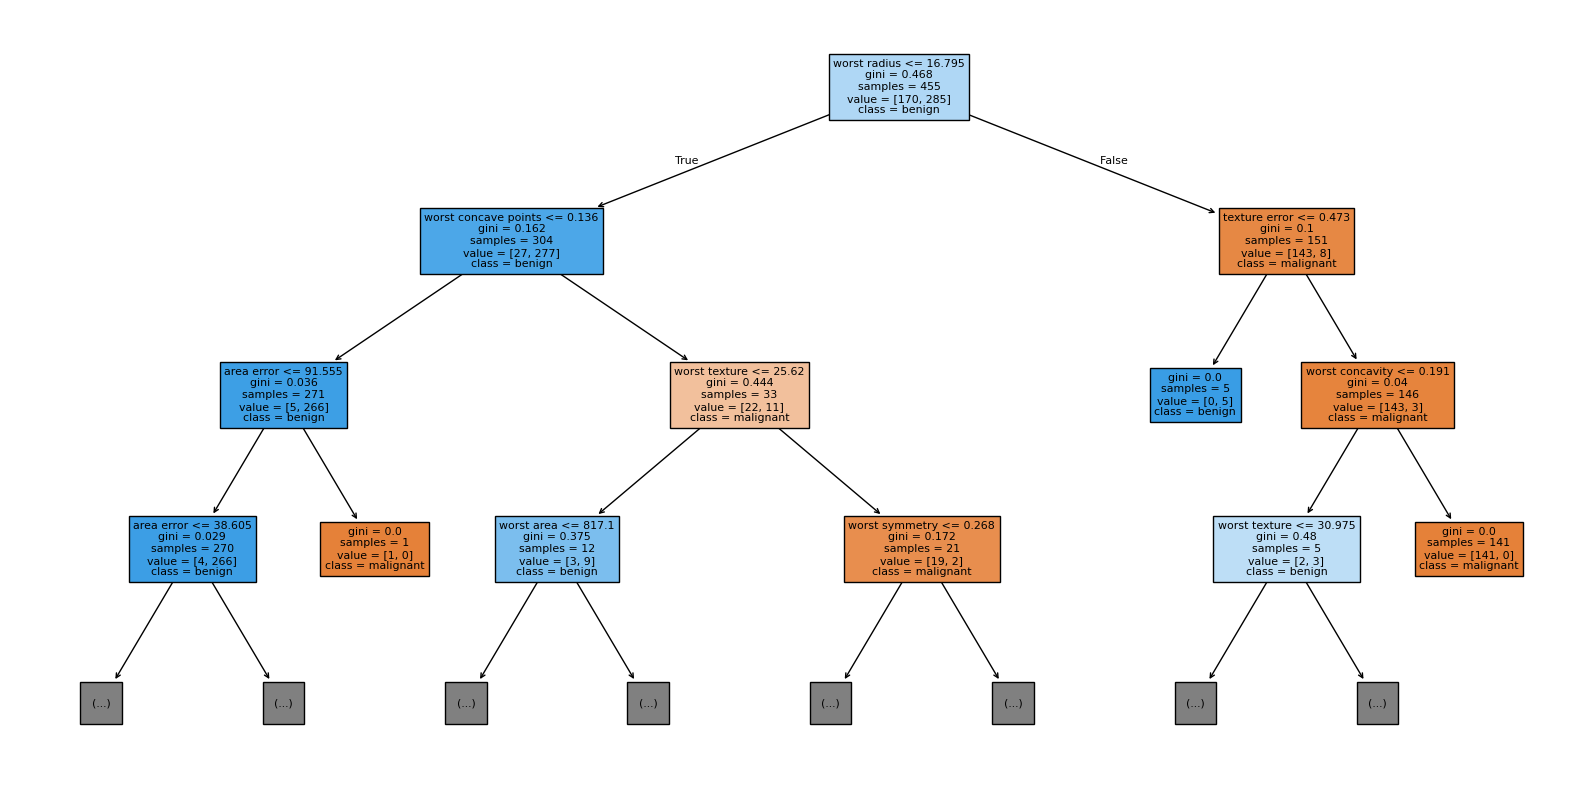

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True,
    max_depth=3  # 너무 복잡하니 위에서 3단계까지만 표시
)
plt.show()

In [ ]:
dt_cv = DecisionTreeClassifier(random_state=42)

scores = cross_val_score(
    dt_cv,
    X_train,
    y_train,
    cv=5,            # 5-fold
    scoring='accuracy'
)

print("각 폴드 정확도:", scores)
print("평균 정확도:", scores.mean())
print("표준편차:", scores.std())

각 폴드 정확도: [0.91208791 0.9010989  0.9010989  0.89010989 0.94505495]
평균 정확도: 0.9098901098901099
표준편차: 0.01890620937811566


In [ ]:
param_grid = {
    'max_depth': [3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_base = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(
    dt_base,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("최적 하이퍼파라미터:", grid.best_params_)
print("교차검증 최고 평균 정확도:", grid.best_score_)

최적 하이퍼파라미터: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
교차검증 최고 평균 정확도: 0.9384615384615385


In [ ]:
best_dt = grid.best_estimator_

y_pred_best = best_dt.predict(X_test)

acc_best = accuracy_score(y_test, y_pred_best)
cm_best = confusion_matrix(y_test, y_pred_best)

print("튜닝 후 테스트 Accuracy:", acc_best)
print("튜닝 후 Confusion Matrix:\n", cm_best)
print("튜닝 후 Classification Report:\n",
      classification_report(y_test, y_pred_best, target_names=data.target_names))

튜닝 후 테스트 Accuracy: 0.9385964912280702
튜닝 후 Confusion Matrix:
 [[39  3]
 [ 4 68]]
튜닝 후 Classification Report:
               precision    recall  f1-score   support

   malignant       0.91      0.93      0.92        42
      benign       0.96      0.94      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
import numpy as np

importances = best_dt.feature_importances_
indices = np.argsort(importances)[::-1]

for idx in indices[:10]:  # 상위 10개만 출력
    print(f"{data.feature_names[idx]} : {importances[idx]:.4f}")

worst radius : 0.7335
worst concave points : 0.1220
texture error : 0.0458
worst texture : 0.0323
worst concavity : 0.0172
mean concave points : 0.0133
area error : 0.0127
mean texture : 0.0118
worst symmetry : 0.0113
worst area : 0.0000


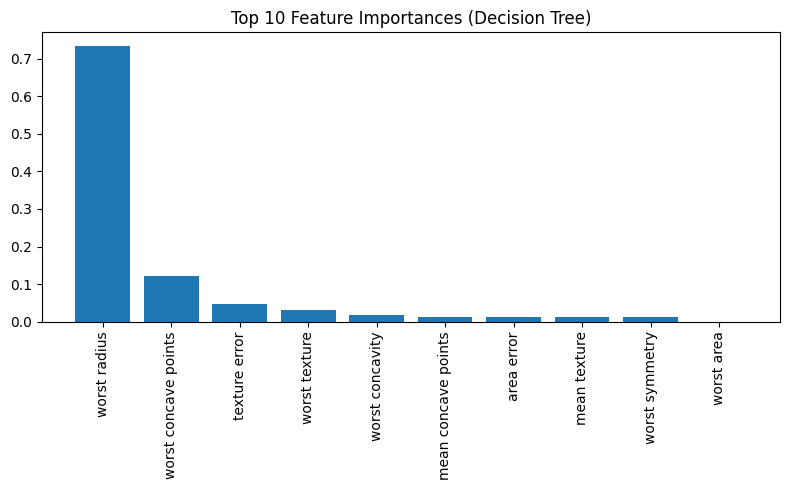

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), [data.feature_names[i] for i in indices[:10]], rotation=90)
plt.title("Top 10 Feature Importances (Decision Tree)")
plt.tight_layout()
plt.show()

# Task
Compare the performance of SVM and Random Forest models using GridSearchCV for hyperparameter tuning and evaluate their accuracy, confusion matrix, and classification reports on the breast cancer dataset.

## Import Libraries

### Subtask:
Import `SVC` from `sklearn.svm` and `RandomForestClassifier` from `sklearn.ensemble`.


**Reasoning**:
I need to import the `SVC` and `RandomForestClassifier` classes as specified in the subtask instructions.



In [14]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

print("SVC and RandomForestClassifier imported successfully.")

SVC and RandomForestClassifier imported successfully.


In [15]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1]
}

print("SVM parameter grid defined:")
print(param_grid_svm)

SVM parameter grid defined:
{'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.001, 0.01, 0.1]}


In [16]:
svc_base = SVC(random_state=42)

grid_svm = GridSearchCV(
    svc_base,
    param_grid_svm,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_svm.fit(X_train, y_train)

print("GridSearchCV for SVM fitting complete.")

GridSearchCV for SVM fitting complete.


In [17]:
print("SVM 최적 하이퍼파라미터:", grid_svm.best_params_)
print("SVM 교차검증 최고 평균 정확도:", grid_svm.best_score_)

SVM 최적 하이퍼파라미터: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
SVM 교차검증 최고 평균 정확도: 0.956043956043956


In [18]:
best_svc = grid_svm.best_estimator_
y_pred_svc = best_svc.predict(X_test)

acc_svc = accuracy_score(y_test, y_pred_svc)
cm_svc = confusion_matrix(y_test, y_pred_svc)

print("SVM Test Accuracy:", acc_svc)
print("SVM Confusion Matrix:\n", cm_svc)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svc, target_names=data.target_names))

SVM Test Accuracy: 0.956140350877193
SVM Confusion Matrix:
 [[38  4]
 [ 1 71]]
SVM Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.90      0.94        42
      benign       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [19]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

print("Random Forest parameter grid defined:")
print(param_grid_rf)

Random Forest parameter grid defined:
{'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_leaf': [1, 2, 4]}


In [20]:
rf_base = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(
    rf_base,
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("GridSearchCV for Random Forest fitting complete.")

GridSearchCV for Random Forest fitting complete.


In [21]:
print("Random Forest 최적 하이퍼파라미터:", grid_rf.best_params_)
print("Random Forest 교차검증 최고 평균 정확도:", grid_rf.best_score_)

Random Forest 최적 하이퍼파라미터: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}
Random Forest 교차검증 최고 평균 정확도: 0.9604395604395606


In [22]:
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Test Accuracy:", acc_rf)
print("Random Forest Confusion Matrix:\n", cm_rf)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=data.target_names))

Random Forest Test Accuracy: 0.956140350877193
Random Forest Confusion Matrix:
 [[39  3]
 [ 2 70]]
Random Forest Classification Report:
               precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

